In [1]:
%load_ext autoreload
%autoreload 2
import warnings
import numpy as np
import time
import os
from dotenv import load_dotenv
os.environ["USE_PYGEOS"] = "0"
import napari_sparrow as nas
from spatialdata import read_zarr
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import sample 
import scanpy as sc
import seaborn as sns
import anndata as ad
%run own_and_modified_functions.ipynb
warnings.simplefilter(action='ignore')

the value of the environment variable BASIC_DCT_BACKEND is not in ["JAX","SCIPY"]


In [2]:
OUTPUT_DIR = '/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data'
sdata = read_zarr( os.path.join(  OUTPUT_DIR, 'sdata.zarr'  ) )
anndata = sc.read('/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/anndataNucA11') # reset original anndata
# delete anndata
del sdata.table
# create anndata
sdata.table = anndata

In [3]:
n_pca = np.count_nonzero(sdata.table.uns['pca']['variance_ratio'] > 0.01)
make_umap(sdata,n_PCAs=n_pca,n_neighbors=15) # umap only used for the visualization, does not have an effect on the annotation with 'score_genes'

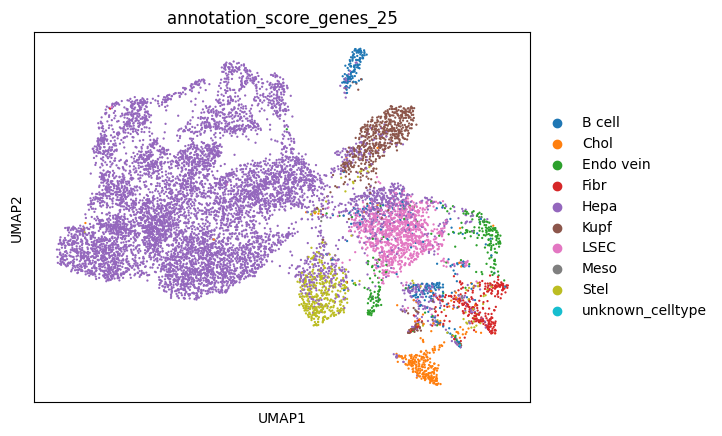

               atlas
B cell      0.621451
Chol        2.673310
Hepa       57.998500
Kupf        3.203686
LSEC        9.241401
Meso        2.796528
Endo vein   3.166185
Fibr        3.042966
Stel       13.768349
Unknown     3.487625
                  annotation_score_genes_25
B cell                             2.858924
Chol                               2.538297
Endo vein                          2.324546
Fibr                               2.502672
Hepa                              71.214820
Kupf                               5.504097
LSEC                               9.164589
Meso                               0.062344
Stel                               3.794086
unknown_celltype                   0.035625


In [4]:
# Original score_genes with HL marker gene list
path_mg = "/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListHL.csv"
mg_dict, scoresper_cluster = score_genes_bins(
    sdata = sdata,
    path_marker_genes = path_mg,
    bins = 25)
visualize_classification(sdata,'annotation_score_genes_25','umap_23_15',path_mg,plot_dot_plot=False,plot_rank_genes_groups=False,plot_image=False)

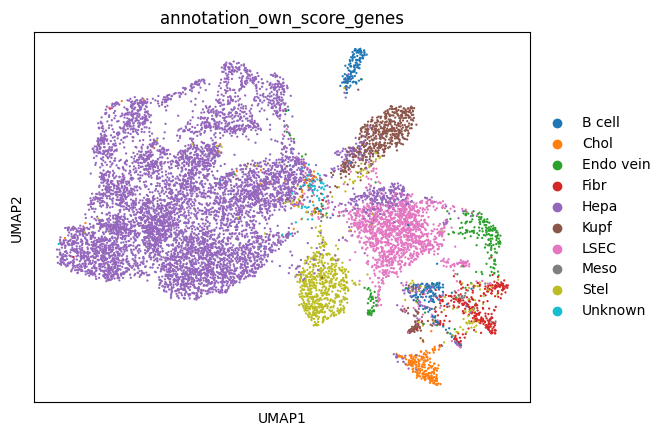

               atlas
B cell      0.621451
Chol        2.673310
Hepa       57.998500
Kupf        3.203686
LSEC        9.241401
Meso        2.796528
Endo vein   3.166185
Fibr        3.042966
Stel       13.768349
Unknown     3.487625
           annotation_own_score_genes
B cell                       2.475953
Chol                         2.280014
Endo vein                    2.110794
Fibr                         2.707517
Hepa                        64.410403
Kupf                         5.860349
LSEC                        12.762736
Meso                         0.409690
Stel                         6.376915
Unknown                      0.605629


Hepa      LSEC  Endo vein      Chol      Kupf      Stel      Fibr  \
0      0.518377  0.006058   0.030701  0.085765  0.021587       NaN  0.034497   
1           NaN  0.077458   0.003792       NaN  0.373149       NaN  0.231369   
2           NaN       NaN   0.001595       NaN  0.023841       NaN  0.232491   
3      0.195218       NaN        NaN  0.036456       NaN       NaN  0.122768   
4      0.248247       NaN        NaN  0.069145       NaN  0.052458  0.032160   
...         ...       ...        ...       ...       ...       ...       ...   
11223  0.322433       NaN        NaN  0.059235       NaN  0.054651  0.029201   
11224  0.516080       NaN        NaN  0.081015  0.065312  0.067269  0.041674   
11225  0.348373  0.007146        NaN  0.058203  0.049473       NaN       NaN   
11226       NaN  0.072516        NaN       NaN  0.062516  0.628982  0.337339   
11227  0.305568  0.292362   0.081682  0.058369  0.635198  0.117443  0.071625   

         B cell      Meso  
0           NaN       NaN  
1           NaN  0.492883  
2           NaN  0.672062  
3           NaN  0.214938  
4           NaN       NaN  
...         ...       ...  
11223       NaN       NaN  
11224       NaN       NaN  
11225       NaN       NaN  
11226       NaN       NaN  
11227  0.011332  0.008365  

[11228 rows x 9 columns]

In [5]:
# Own score genes with HL marker gene list
path_mg = "/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListHL.csv"
scores = own_score_genes(sdata,path_mg)
visualize_classification(sdata,'annotation_own_score_genes','umap_23_15',path_mg,plot_dot_plot=False,plot_rank_genes_groups=False,plot_image=False)
scores

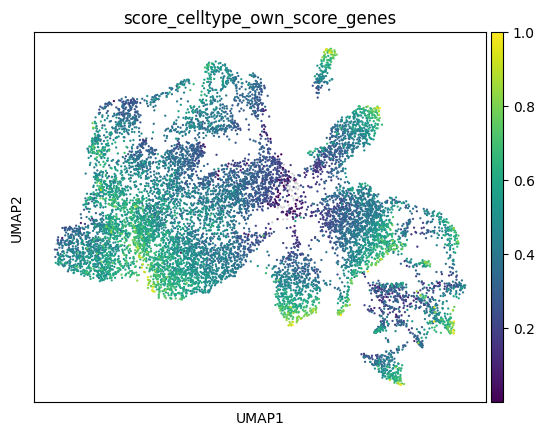

In [6]:
sc.pl.umap(sdata.table,color=['score_celltype_own_score_genes'])

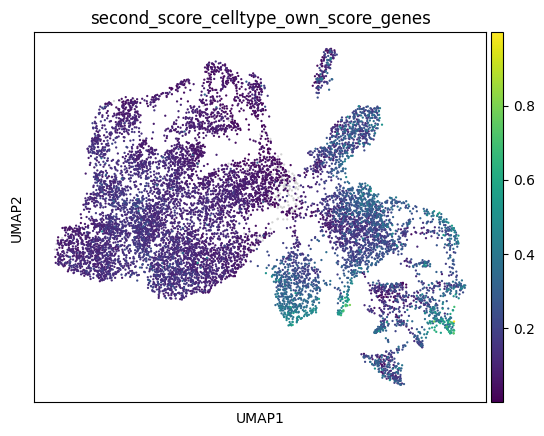

In [7]:
sc.pl.umap(sdata.table,color=['second_score_celltype_own_score_genes'])

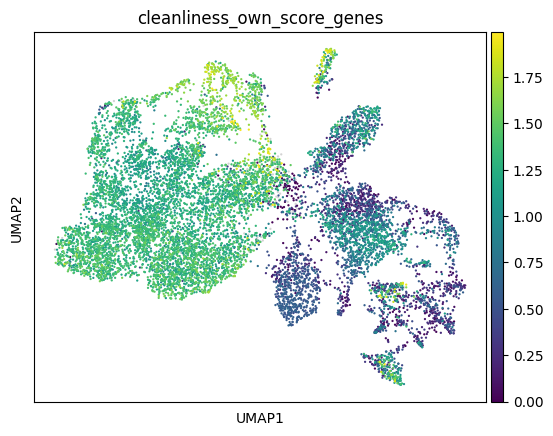

In [8]:
sc.pl.umap(sdata.table,color=['cleanliness_own_score_genes'])

Hepa          8.669
LSEC          9.333
Endo vein     7.250
Chol          7.500
Kupf         19.500
Stel         16.001
Fibr         17.625
B cell        4.500
Meso          6.000
dtype: float64


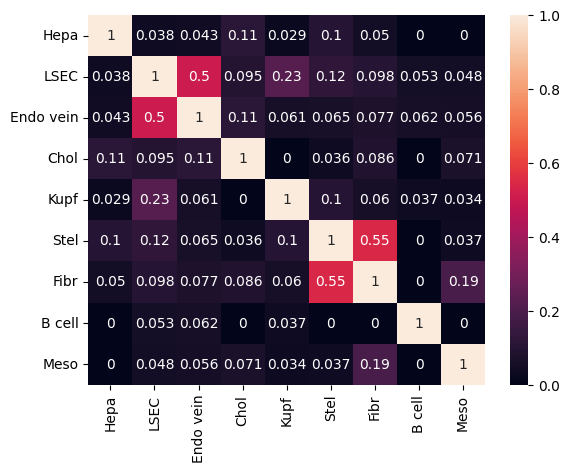

In [9]:
path_mg = "/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListHL.csv"
Jaccard_similarity_matrix(path_mg)

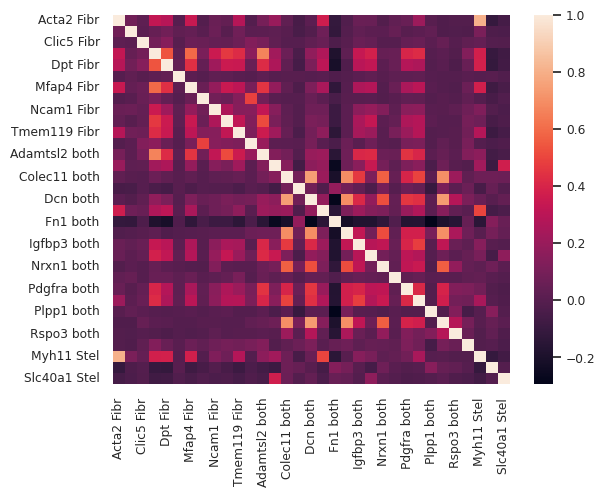

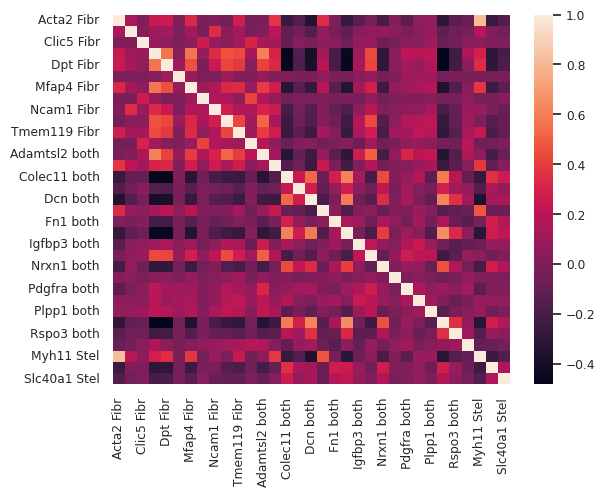

In [10]:
# plot correlation matrix of the gene expression of the marker genes of 2 confused cell types
# confusion between fibroblasts and stellate cells
# expression of all cells
sns.set(font_scale=0.8)
correlation_matrix_expression_marker_genes_of_2_cell_types(sdata.table,path_mg,'Fibr','Stel')
plt.show()
# expression of cells that are classified as fibroblasts or stellate cells
adata_sub = sdata.table[(sdata.table.obs['annotation_own_score_genes'] == 'Fibr') | (sdata.table.obs['annotation_own_score_genes'] == 'Stel'),:]
correlation_matrix_expression_marker_genes_of_2_cell_types(adata_sub,path_mg,'Fibr','Stel')

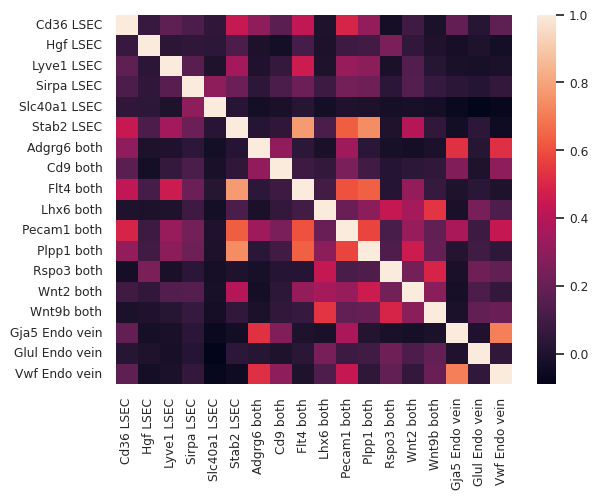

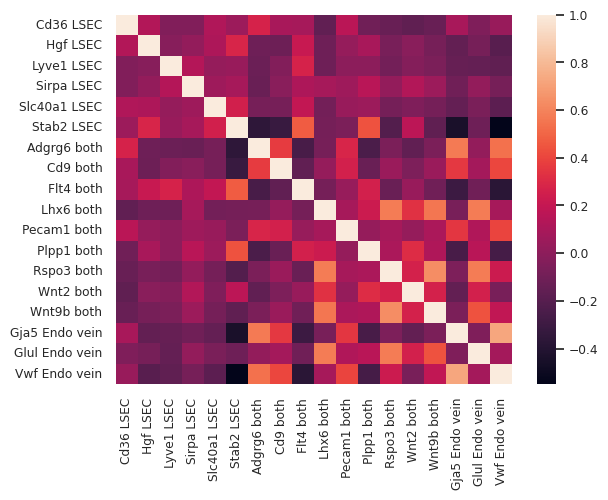

In [11]:
# plot correlation matrix of the gene expression of the marker genes of 2 confused cell types
# confusion between LSECs and Endo vein cells
# expression of all cells
correlation_matrix_expression_marker_genes_of_2_cell_types(sdata.table,path_mg,'LSEC','Endo vein')
plt.show()
# expression of cells that are classified as fibroblasts or stellate cells
adata_sub = sdata.table[(sdata.table.obs['annotation_own_score_genes'] == 'LSEC') | (sdata.table.obs['annotation_own_score_genes'] == 'Endo vein'),:]
correlation_matrix_expression_marker_genes_of_2_cell_types(adata_sub,path_mg,'LSEC','Endo vein')

<AxesSubplot: >

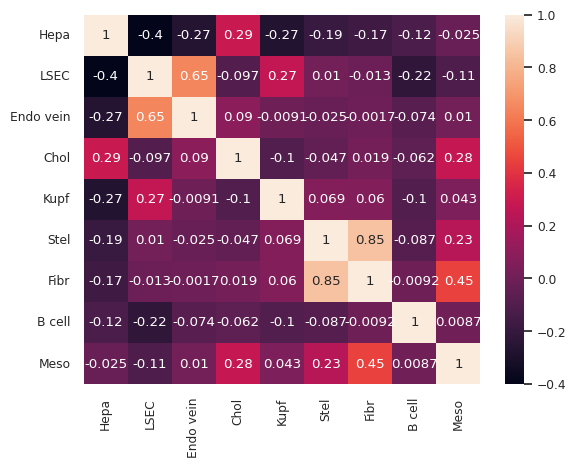

In [12]:
# plot correlation matrix of the features
sns.heatmap(scores.corr(method='pearson'), annot=True)
# sns.heatmap(scores_minmax.corr(method='pearson'), annot=True) gives the same heatmap

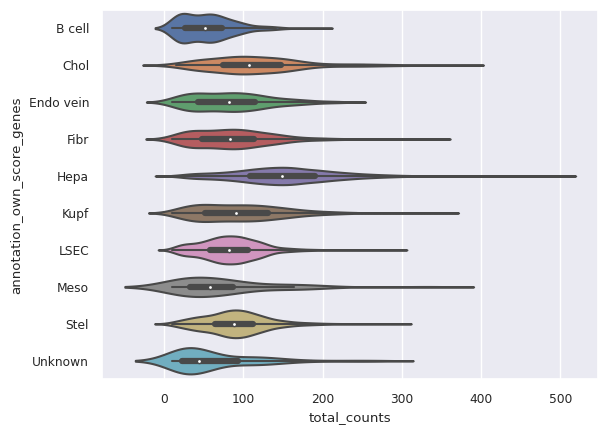

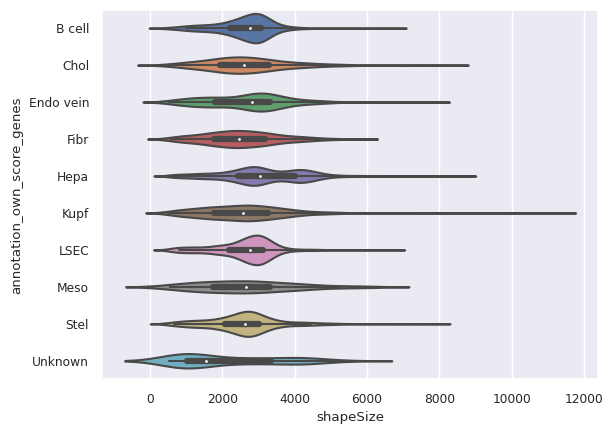

<AxesSubplot: xlabel='count_density', ylabel='annotation_own_score_genes'>

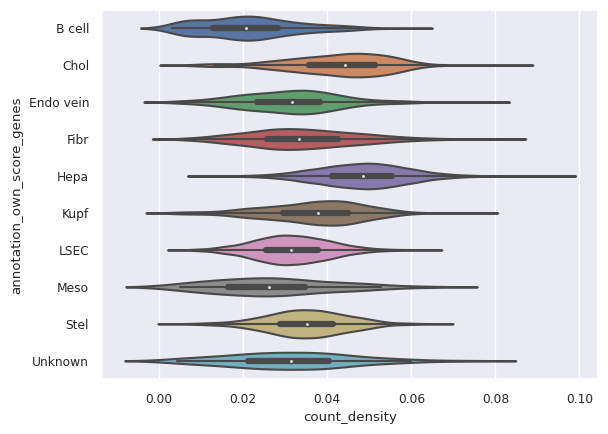

In [13]:
sns.violinplot(data=sdata.table.obs,x="total_counts",y="annotation_own_score_genes")
plt.show()
sns.violinplot(data=sdata.table.obs,x="shapeSize",y="annotation_own_score_genes")
plt.show()
sdata.table.obs['count_density'] = sdata.table.obs['total_counts'] / sdata.table.obs['shapeSize']
sns.violinplot(data=sdata.table.obs,x="count_density",y="annotation_own_score_genes")

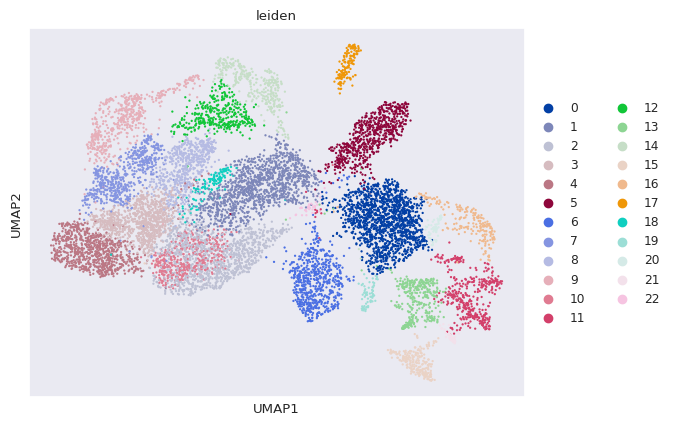

In [14]:
sc.tl.leiden(sdata.table,resolution=1,key_added='leiden')
sdata.table.obs
sc.pl.umap(sdata.table,color=['leiden'])

In [15]:
cell_types = ['Hepa','Kupf','LSEC','Endo vein','Fibr','Stel','Meso','Chol','B cell']
leiden_clusters = [[1,2,3,4,7,8,9,10,12,14,18,20,21,22],[5],[0],[16,19],[11],[6],[13],[15],[17]]
a = sdata.table.obs['leiden']
i = 0
for putative_leiden_clusters in leiden_clusters:
    L = [str(x) for x in putative_leiden_clusters]
    for n in L:
        a = a.replace(n,cell_types[i])
    i += 1
sdata.table.obs['leiden_cell_types'] = a
# cells per leiden_cell_type cluster, to see the max number of n_cells you can take per cluster (149 in this case)
print(sdata.table.obs['leiden_cell_types'].value_counts())
min_cells_per_leiden_cell_type = sdata.table.obs['leiden_cell_types'].value_counts().min()

Hepa         7081
LSEC         1415
Kupf          665
Stel          637
Fibr          415
Meso          353
Endo vein     270
Chol          243
B cell        149
Name: leiden_cell_types, dtype: int64


Summary:
Hepa
Maybe drop:[['Slc40a1', 'LSEC'], ['Glul', 'Endo vein']]
Fibr
Maybe drop:[['Fn1', 'Hepa'], ['Cxcl12', 'Hepa'], ['Hgf', 'LSEC'], ['Plpp1', 'Endo vein'], ['Fn1', 'Stel'], ['Fn1', 'Chol']]
Stel
Maybe drop:[['Fn1', 'Hepa'], ['Plpp1', 'Endo vein'], ['Axl', 'Fibr'], ['Lpl', 'Fibr'], ['Plpp1', 'Fibr']]
Chol
Maybe drop:[['Fn1', 'Hepa'], ['Adgrg6', 'Endo vein']]
Kupf
Maybe drop:[['Cd36', 'LSEC'], ['Plpp1', 'Endo vein'], ['Plpp1', 'Fibr'], ['Pecam1', 'B cell']]
LSEC
Maybe drop:[['Adgrg6', 'Endo vein'], ['Adgrg6', 'Chol']]
Meso
Maybe drop:[['Plpp1', 'Endo vein'], ['Tmem119', 'Fibr'], ['Plpp1', 'Fibr']]
Summary:
Hepa
Maybe drop:[['Glul', 'Endo vein']]
Fibr
Maybe drop:[['Fn1', 'Hepa'], ['Hgf', 'LSEC'], ['Plpp1', 'Endo vein'], ['Fn1', 'Stel'], ['Fn1', 'Chol']]
Stel
Maybe drop:[['Fn1', 'Hepa'], ['Plpp1', 'Endo vein'], ['Lpl', 'Fibr'], ['Axl', 'Fibr'], ['Plpp1', 'Fibr']]
Chol
Maybe drop:[['Fn1', 'Hepa'], ['Adgrg6', 'Endo vein']]
Kupf
Maybe drop:[['Cd36', 'LSEC'], ['Plpp1', 'Endo vein'], [

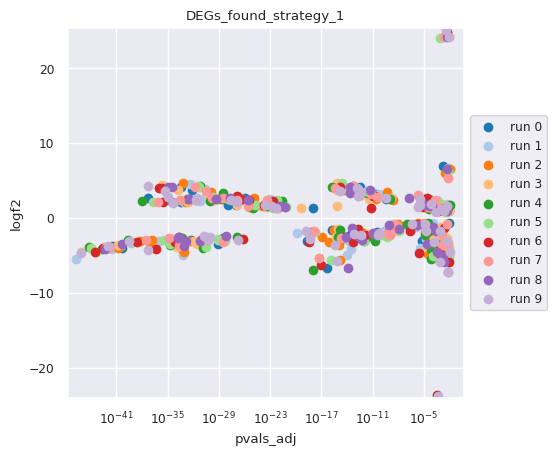

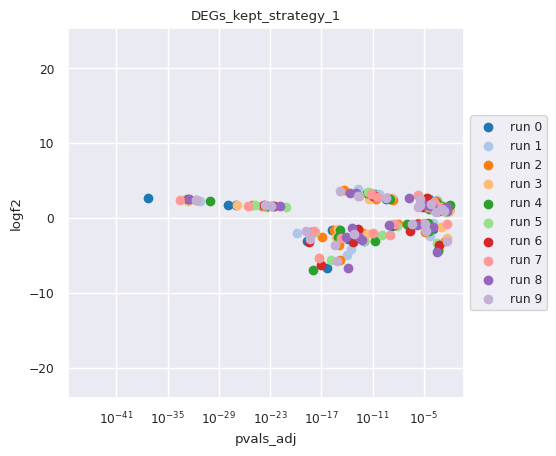

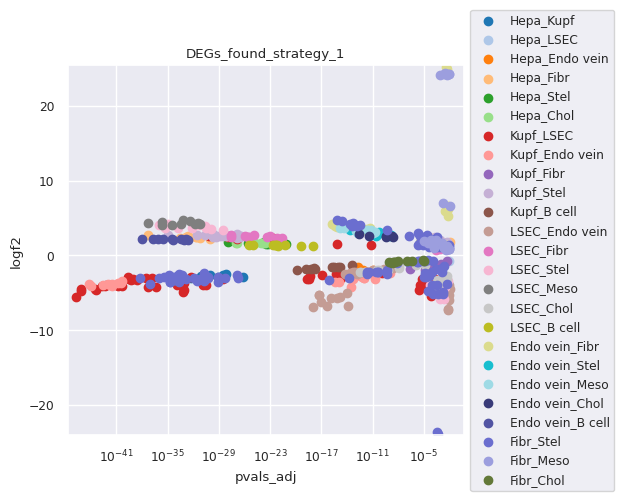

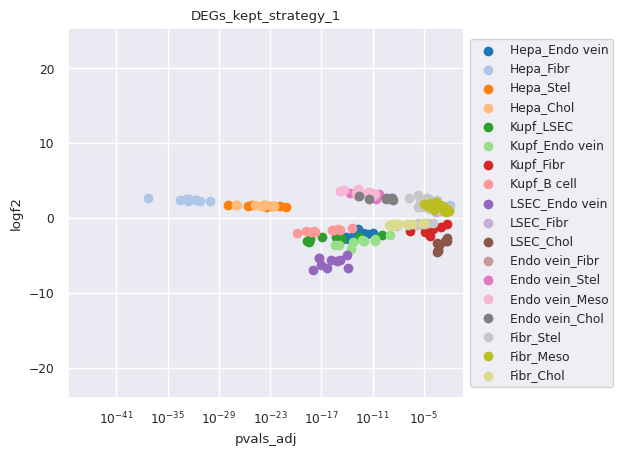

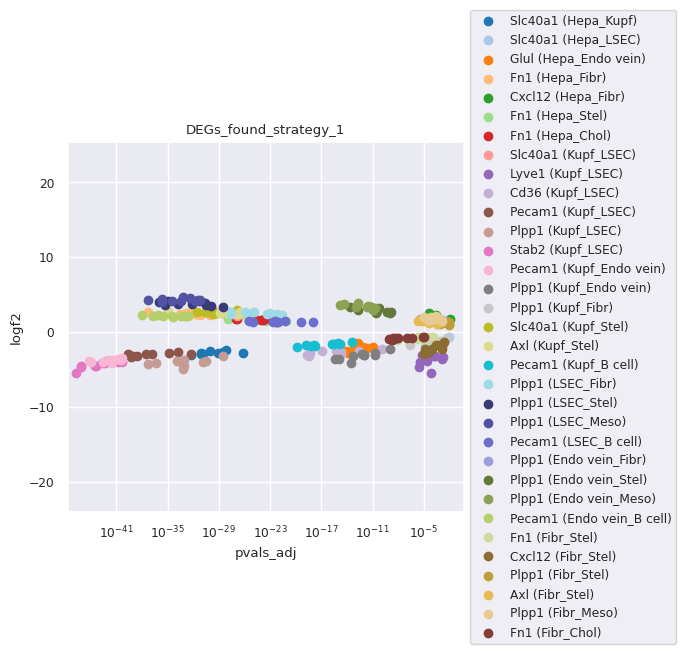

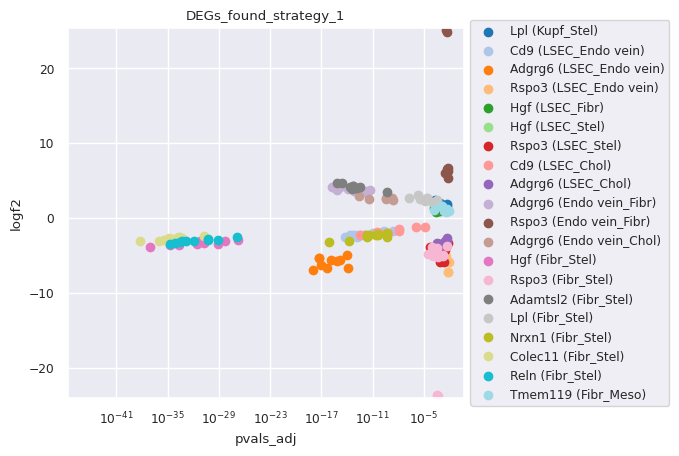

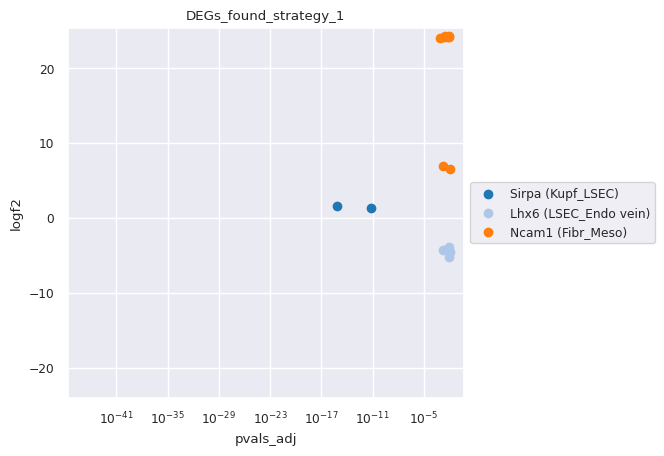

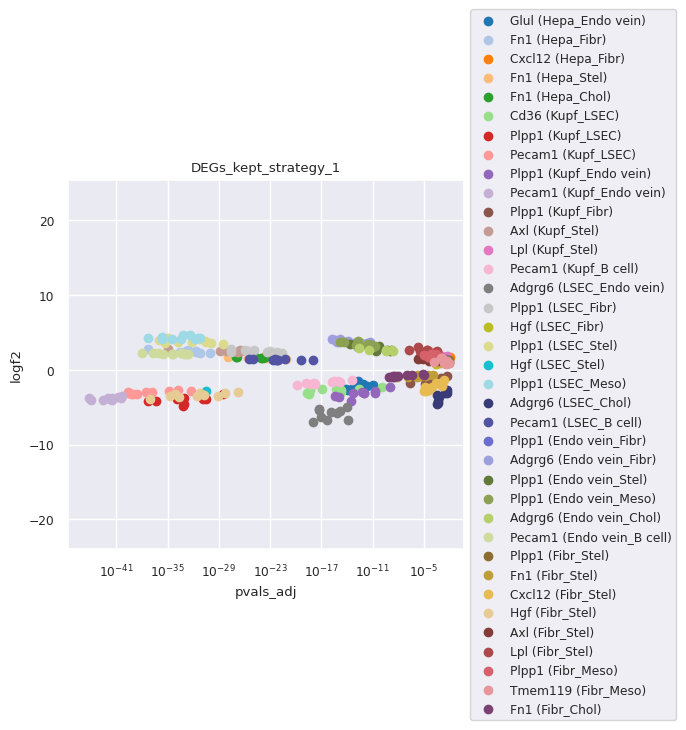

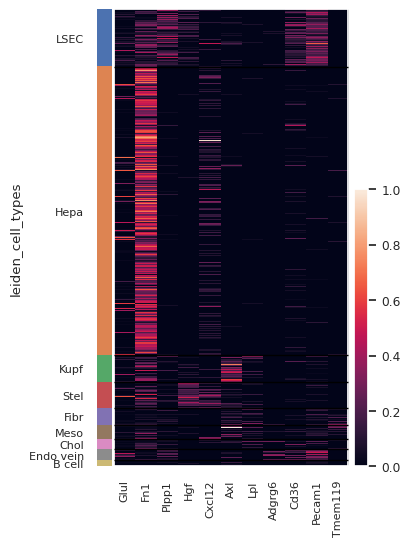

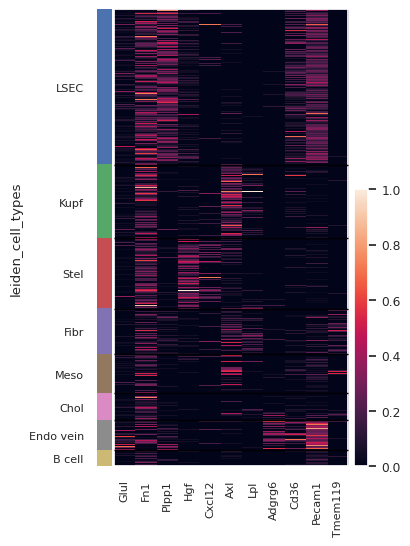

In [16]:
path_mg = "/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListHL.csv"
# STRATEGY 1 to change the marker gene list
cell_types = ['Hepa','Kupf','LSEC','Endo vein','Fibr','Stel','Meso','Chol','B cell']
leiden_clusters = [[1,2,3,4,7,8,9,10,12,14,18,20,21,22],[5],[0],[16,19],[11],[6],[13],[15],[17]]
results_strat1_10, results_runs1_10, DEG_details_runs1_10 = Apply_strategy_multiple_times(sdata.table,cell_types,leiden_clusters,path_mg,10,min_cells_per_leiden_cell_type,1)

In [17]:
results_strat1_10

{'Hepa': [('Glul', 'Endo vein')],
 'Fibr': [('Fn1', 'Chol'),
  ('Fn1', 'Hepa'),
  ('Fn1', 'Stel'),
  ('Plpp1', 'Endo vein'),
  ('Hgf', 'LSEC'),
  ('Cxcl12', 'Hepa')],
 'Stel': [('Axl', 'Fibr'),
  ('Fn1', 'Hepa'),
  ('Lpl', 'Fibr'),
  ('Plpp1', 'Endo vein'),
  ('Plpp1', 'Fibr')],
 'Chol': [('Fn1', 'Hepa'), ('Adgrg6', 'Endo vein')],
 'Kupf': [('Cd36', 'LSEC'),
  ('Pecam1', 'B cell'),
  ('Plpp1', 'Endo vein'),
  ('Plpp1', 'Fibr')],
 'LSEC': [('Adgrg6', 'Endo vein'), ('Adgrg6', 'Chol')],
 'Meso': [('Plpp1', 'Endo vein'), ('Plpp1', 'Fibr'), ('Tmem119', 'Fibr')]}

In [18]:
# Update marker gene list based on STRATEGY 1:
df_mg = pd.read_csv(path_mg,index_col=0)
keys = results_strat1_10.keys()
for key in keys:
    f = [x[0] for x in results_strat1_10[key]]
    f = np.unique(f).tolist()
    df_mg.loc[f,key] = 0
df_mg.to_csv("/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListHL_modified1.csv")

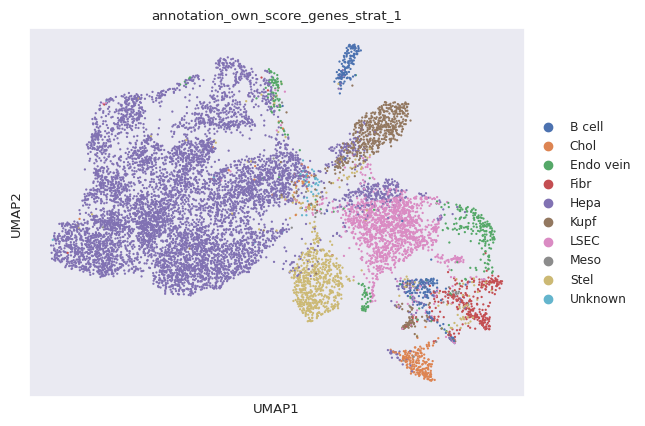

               atlas
B cell      0.621451
Chol        2.673310
Hepa       57.998500
Kupf        3.203686
LSEC        9.241401
Meso        2.796528
Endo vein   3.166185
Fibr        3.042966
Stel       13.768349
Unknown     3.487625
           annotation_own_score_genes_strat_1
B cell                               2.529391
Chol                                 2.146420
Endo vein                            2.867830
Fibr                                 2.805486
Hepa                                64.054150
Kupf                                 5.824724
LSEC                                12.691486
Meso                                 0.311721
Stel                                 6.430353
Unknown                              0.338440


In [19]:
# Own score genes with modified marker gene list based on STRATREGY 1
path_mg_mod1 = "/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListHL_modified1.csv"
scores = own_score_genes(sdata,path_mg_mod1,suffix='_strat_1')
visualize_classification(sdata,'annotation_own_score_genes_strat_1','umap_23_15',path_mg_mod1,plot_dot_plot=False,plot_rank_genes_groups=False,plot_image=False)

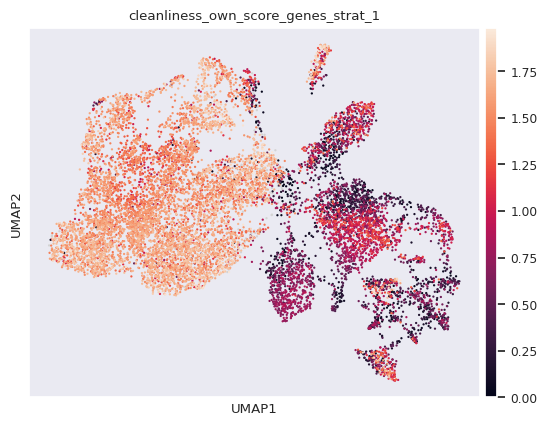

In [20]:
sc.pl.umap(sdata.table,color=['cleanliness_own_score_genes_strat_1'])

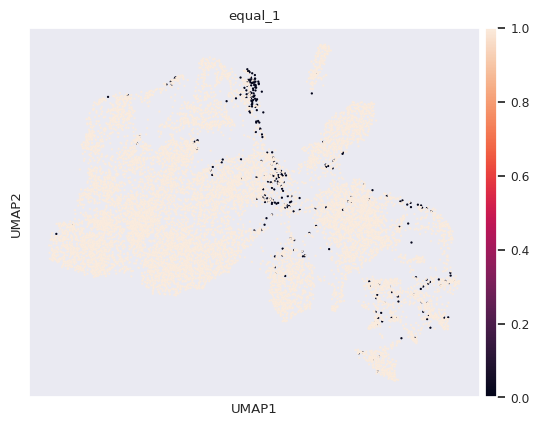

In [21]:
l = [sdata.table.obs['annotation_own_score_genes'].to_list()[i] == sdata.table.obs['annotation_own_score_genes_strat_1'].to_list()[i] for i in range(len(sdata.table.obs['annotation_own_score_genes'].to_list()))]
# list with True False to 0 1
sdata.table.obs['equal_1'] = [int(i) for i in l]
sc.pl.umap(sdata.table,color=['equal_1'])

Hepa          8.002
LSEC          8.833
Endo vein     7.250
Chol          6.000
Kupf         18.000
Stel         13.501
Fibr         14.625
B cell        4.500
Meso          4.500
dtype: float64


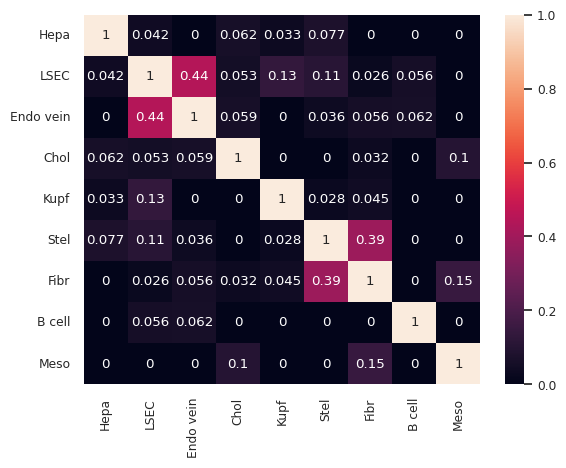

In [22]:
Jaccard_similarity_matrix(path_mg_mod1)

Adgre1
Is marker gene of: ['Kupf']
Could also be a marker gene of: ['Meso']
Axl
Is marker gene of: ['Kupf']
Could also be a marker gene of: ['Meso']
C5ar1
Is marker gene of: ['Kupf']
Could also be a marker gene of: ['Meso']
Ccr2
Is marker gene of: []
Could also be a marker gene of: ['Meso']
Cd36
Is marker gene of: []
Could also be a marker gene of: ['Endo vein']
Cd3e
Is marker gene of: []
Could also be a marker gene of: ['Meso']
Clec10a
Is marker gene of: []
Could also be a marker gene of: ['Meso']
Clec9a
Is marker gene of: []
Could also be a marker gene of: ['Kupf', 'LSEC']
Cx3cr1
Is marker gene of: []
Could also be a marker gene of: ['Meso']
Cyp2e1
Is marker gene of: []
Could also be a marker gene of: ['Kupf', 'LSEC', 'Stel']
Dpt
Is marker gene of: []
Could also be a marker gene of: ['Meso', 'Chol']
F13a1
Is marker gene of: []
Could also be a marker gene of: ['Meso']
Gdf15
Is marker gene of: []
Could also be a marker gene of: ['LSEC']
Ghr
Is marker gene of: ['Hepa']
Could also be a m

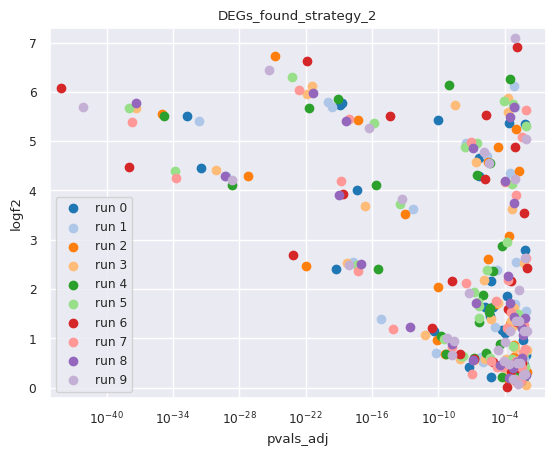

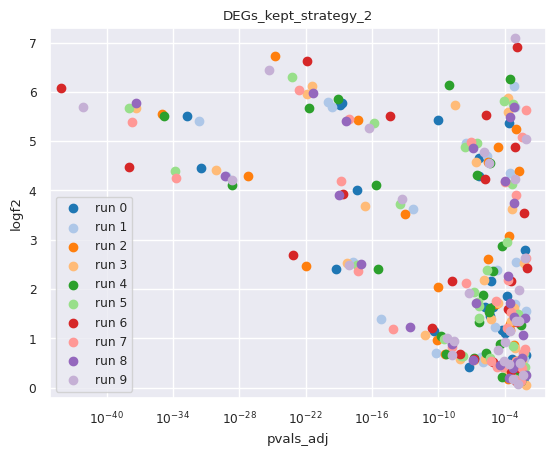

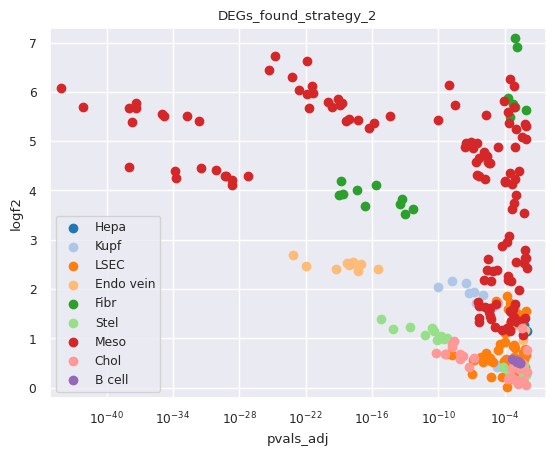

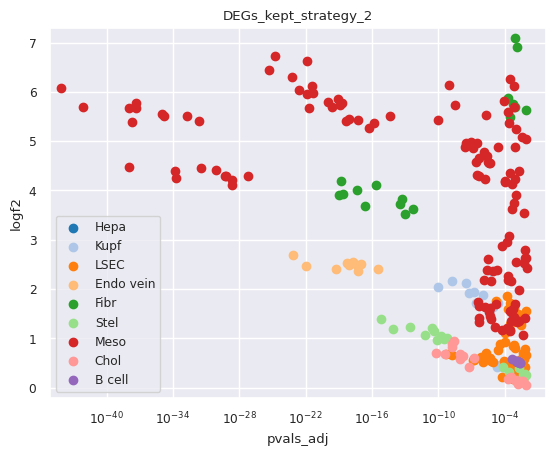

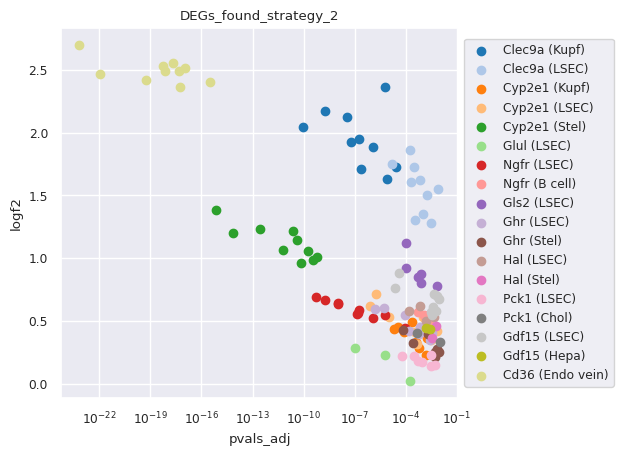

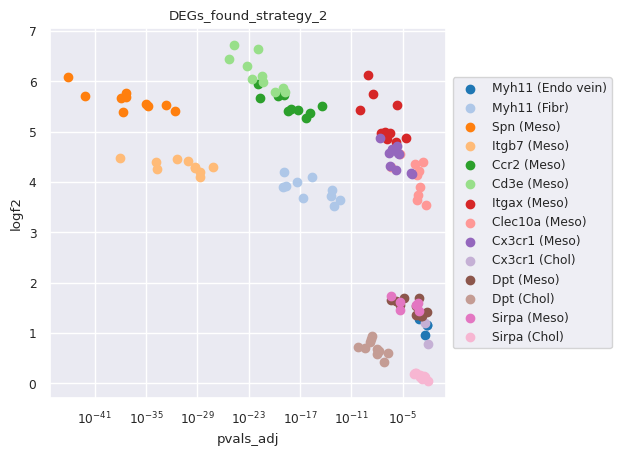

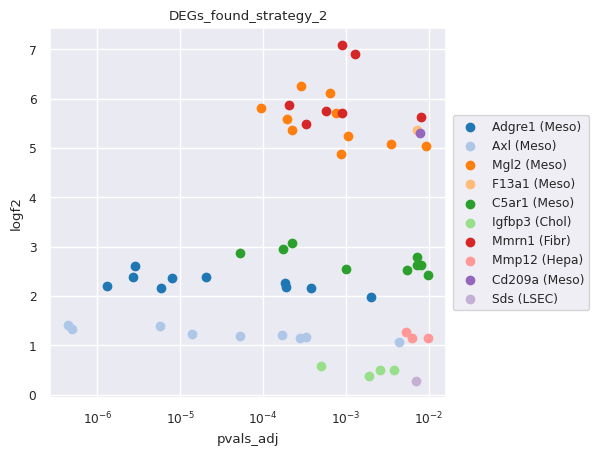

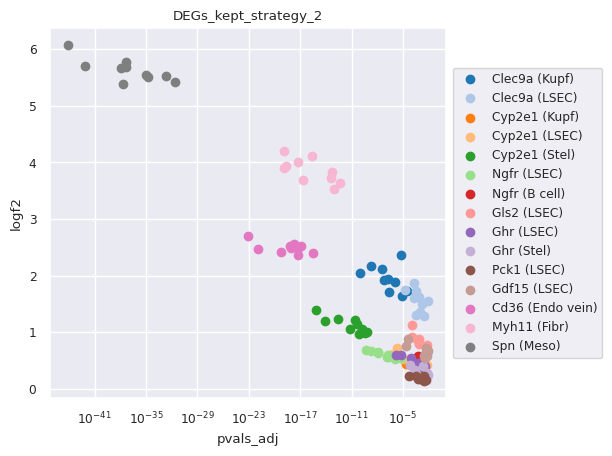

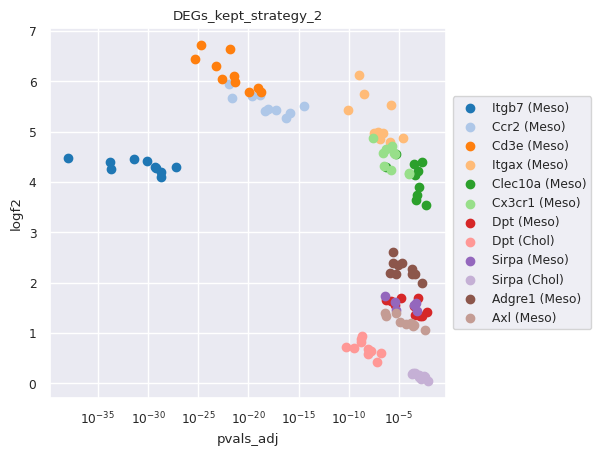

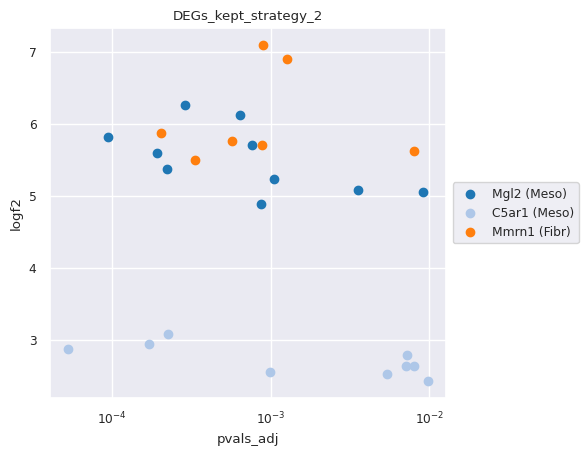

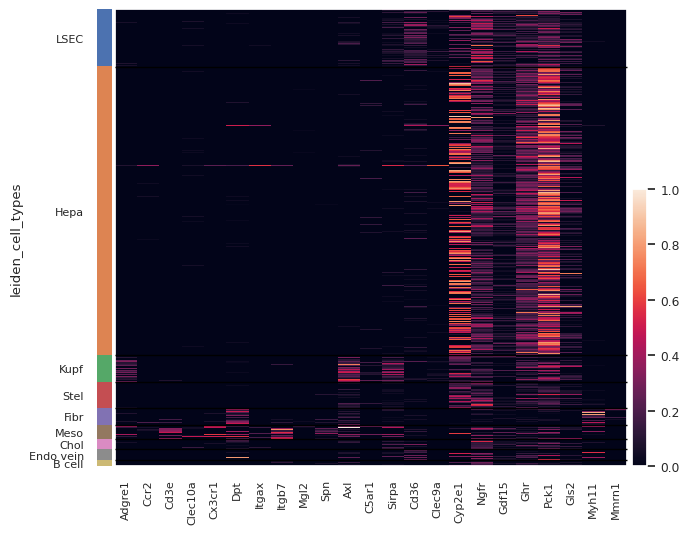

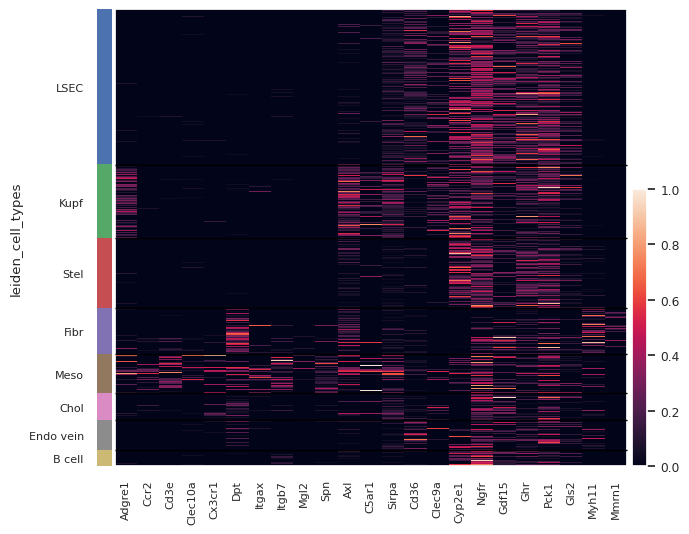

In [23]:
# STRATEGY 2 to change the marker gene list
cell_types = ['Hepa','Kupf','LSEC','Endo vein','Fibr','Stel','Meso','Chol','B cell']
leiden_clusters = [[1,2,3,4,7,8,9,10,12,14,18,20,21,22],[5],[0],[16,19],[11],[6],[13],[15],[17]]
results_strat2_10, results_runs2_10, DEG_details_runs2_10 = Apply_strategy_multiple_times(sdata.table,cell_types,leiden_clusters,path_mg,10,min_cells_per_leiden_cell_type,2)

In [24]:
# Update marker gene list based on STRATEGY 2:
df_mg = pd.read_csv(path_mg,index_col=0)
keys = results_strat2_10.keys()
for key in keys:
    df_mg.loc[results_strat2_10[key],key] = 0.5
df_mg.to_csv("/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListHL_modified2.csv")

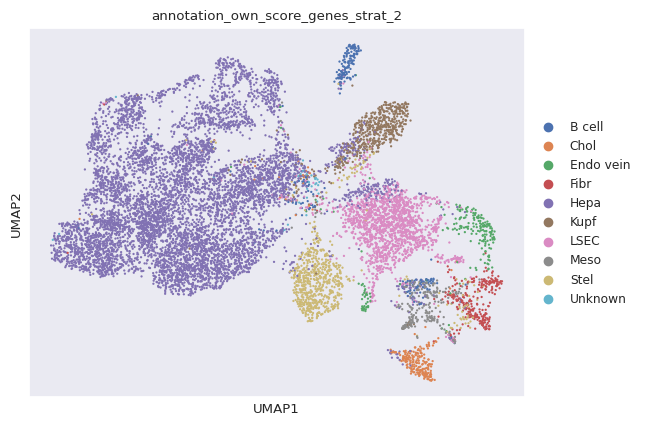

               atlas
B cell      0.621451
Chol        2.673310
Hepa       57.998500
Kupf        3.203686
LSEC        9.241401
Meso        2.796528
Endo vein   3.166185
Fibr        3.042966
Stel       13.768349
Unknown     3.487625
           annotation_own_score_genes_strat_2
B cell                               2.377984
Chol                                 2.190951
Endo vein                            1.986106
Fibr                                 2.502672
Hepa                                63.270395
Kupf                                 5.121126
LSEC                                13.751336
Meso                                 2.351265
Stel                                 6.145351
Unknown                              0.302814


In [25]:
# Own score genes with modified marker gene list based on STRATREGY 2
path_mg_mod2 = "/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListHL_modified2.csv"
scores = own_score_genes(sdata,path_mg_mod2,suffix='_strat_2')
visualize_classification(sdata,'annotation_own_score_genes_strat_2','umap_23_15',path_mg_mod2,plot_dot_plot=False,plot_rank_genes_groups=False,plot_image=False)

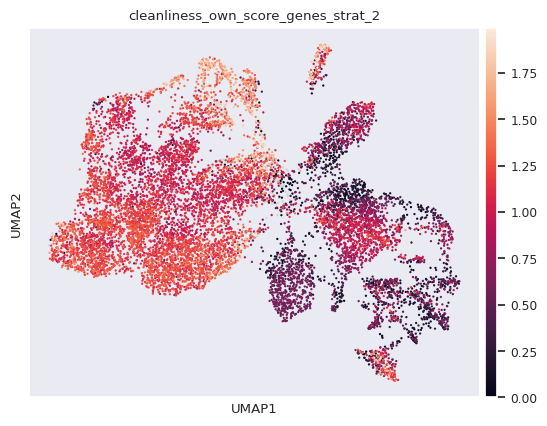

In [26]:
sc.pl.umap(sdata.table,color=['cleanliness_own_score_genes_strat_2'])
# makes sense that this becomes worse, because more marker genes overlap between cell types
# but does not mean that the annotation is worse

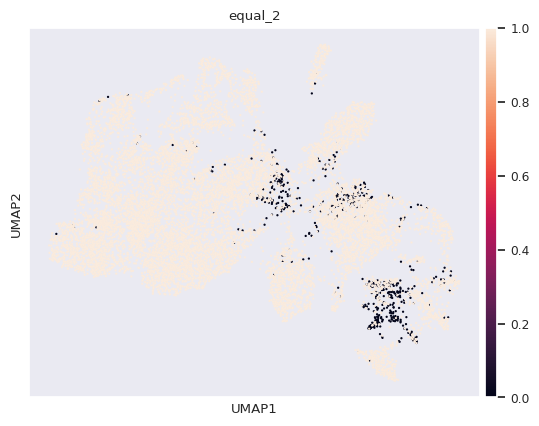

In [27]:
l = [sdata.table.obs['annotation_own_score_genes'].to_list()[i] == sdata.table.obs['annotation_own_score_genes_strat_2'].to_list()[i] for i in range(len(sdata.table.obs['annotation_own_score_genes'].to_list()))]
# list with True False to 0 1
sdata.table.obs['equal_2'] = [int(i) for i in l]
sc.pl.umap(sdata.table,color=['equal_2'])

Hepa          8.669
LSEC         12.833
Endo vein     7.750
Chol          8.500
Kupf         20.500
Stel         17.001
Fibr         18.625
B cell        5.000
Meso         12.500
dtype: float64


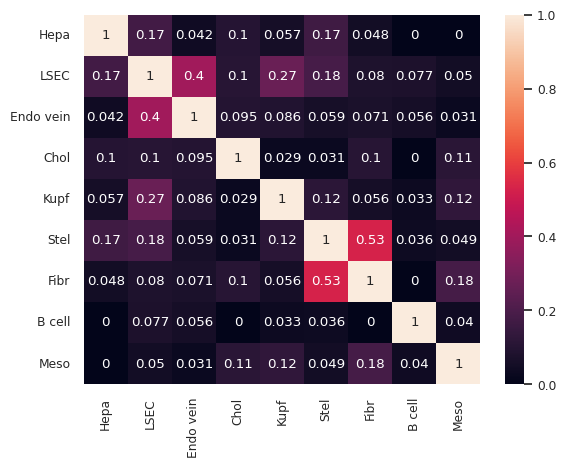

In [28]:
Jaccard_similarity_matrix(path_mg_mod2)

In [29]:
# STRATEGY 1 and STRATEGY 2 combined to change the marker gene list

In [30]:
# Update marker gene list based on STRATEGY 1 and STRATEGY 2:
df_mg = pd.read_csv(path_mg,index_col=0)
keys = results_strat1_10.keys()
for key in keys:
    f = [x[0] for x in results_strat1_10[key]]
    f = np.unique(f).tolist()
    df_mg.loc[f,key] = 0
keys = results_strat2_10.keys()
for key in keys:
    df_mg.loc[results_strat2_10[key],key] = 0.5
df_mg.to_csv("/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListHL_modified_1_2.csv")

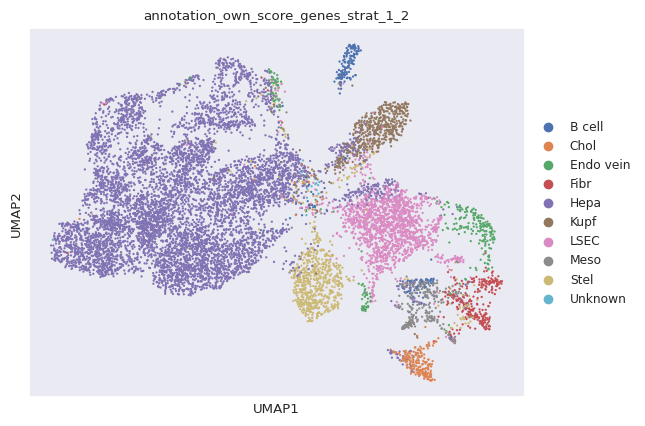

               atlas
B cell      0.621451
Chol        2.673310
Hepa       57.998500
Kupf        3.203686
LSEC        9.241401
Meso        2.796528
Endo vein   3.166185
Fibr        3.042966
Stel       13.768349
Unknown     3.487625
           annotation_own_score_genes_strat_1_2
B cell                                 2.057357
Chol                                   2.101888
Endo vein                              2.520485
Fibr                                   2.547203
Hepa                                  62.833986
Kupf                                   5.049875
LSEC                                  13.724617
Meso                                   2.689704
Stel                                   6.314571
Unknown                                0.160314


In [31]:
# Own score genes with modified marker gene list based on STRATREGY 1 and STRATEGY 2
path_mg_mod_1_2 = "/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListHL_modified_1_2.csv"
scores = own_score_genes(sdata,path_mg_mod_1_2,suffix='_strat_1_2')
visualize_classification(sdata,'annotation_own_score_genes_strat_1_2','umap_23_15',path_mg_mod_1_2,plot_dot_plot=False,plot_rank_genes_groups=False,plot_image=False)

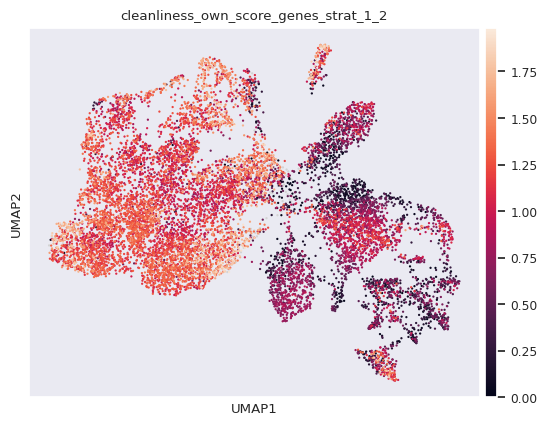

In [32]:
sc.pl.umap(sdata.table,color=['cleanliness_own_score_genes_strat_1_2'])

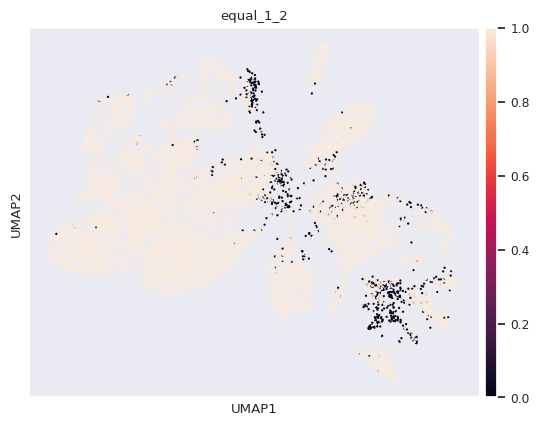

In [33]:
l = [sdata.table.obs['annotation_own_score_genes'].to_list()[i] == sdata.table.obs['annotation_own_score_genes_strat_1_2'].to_list()[i] for i in range(len(sdata.table.obs['annotation_own_score_genes'].to_list()))]
# list with True False to 0 1
sdata.table.obs['equal_1_2'] = [int(i) for i in l]
sc.pl.umap(sdata.table,color=['equal_1_2'])

Hepa          8.002
LSEC         12.333
Endo vein     7.750
Chol          7.000
Kupf         19.000
Stel         14.501
Fibr         15.625
B cell        5.000
Meso         11.000
dtype: float64


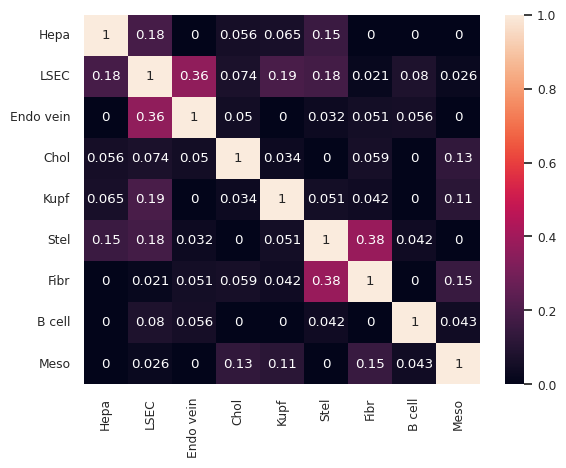

In [34]:
Jaccard_similarity_matrix(path_mg_mod_1_2)

In [35]:
sdata.table.obs

region  instance  n_genes_by_counts  log1p_n_genes_by_counts  \
cells                                                                
64         1         1                 12                 2.564949   
66         1         1                 16                 2.833213   
67         1         1                 15                 2.772589   
68         1         1                  8                 2.197225   
69         1         1                  6                 1.945910   
...      ...       ...                ...                      ...   
28929      1         1                  8                 2.197225   
28944      1         1                 11                 2.484907   
28992      1         1                 10                 2.397895   
29115      1         1                 16                 2.833213   
29130      1         1                 29                 3.401197   

       total_counts  log1p_total_counts  pct_counts_in_top_2_genes  \
cells                                                                
64              150            5.017280                  74.666667   
66               38            3.663562                  36.842105   
67               50            3.931826                  52.000000   
68               84            4.442651                  80.952381   
69               52            3.970292                  67.307692   
...             ...                 ...                        ...   
28929           108            4.691348                  87.037037   
28944           155            5.049856                  71.612903   
28992           132            4.890349                  71.969697   
29115            98            4.595120                  55.102041   
29130           168            5.129899                  36.309524   

       pct_counts_in_top_5_genes  n_counts  shapeSize  ...  \
cells                                                  ...   
64                     92.000000       150     2545.0  ...   
66                     68.421053        38     1257.0  ...   
67                     76.000000        50     3057.0  ...   
68                     95.238095        84     2071.0  ...   
69                     98.076923        52     1637.0  ...   
...                          ...       ...        ...  ...   
28929                  97.222222       108     2285.0  ...   
28944                  92.258065       155     1942.0  ...   
28992                  94.696970       132     3627.0  ...   
29115                  78.571429        98     3011.0  ...   
29130                  59.523810       168     3015.0  ...   

      annotation_own_score_genes_strat_2  \
cells                                      
64                                  Hepa   
66                                  Meso   
67                                  Meso   
68                                  Hepa   
69                                  Hepa   
...                                  ...   
28929                               Hepa   
28944                               Hepa   
28992                               Hepa   
29115                               Stel   
29130                               Kupf   

       score_celltype_own_score_genes_strat_2  \
cells                                           
64                                   0.518377   
66                                   0.731028   
67                                   0.530217   
68                                   0.195218   
69                                   0.248247   
...                                       ...   
28929                                0.322433   
28944                                0.516080   
28992                                0.348373   
29115                                0.626406   
29130                                0.627606   

      second_score_celltype_own_score_genes_strat_2  \
cells                                                 
64                                         0.139465   
6